In [106]:
import numpy as np 
import matplotlib.pyplot as plt

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , SGDRegressor
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [108]:
X = 6*np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 *X + 2 + np.random.randn(200,1)

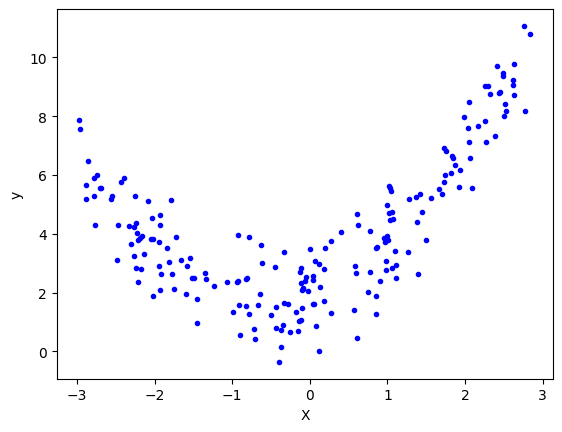

In [109]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [110]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size =0.2 , random_state =2) 

In [111]:
#liner regresion

lr = LinearRegression()

In [112]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [113]:
y_pred = lr.predict(X_test)
r2_score(y_test , y_pred)

-0.01341645826664406

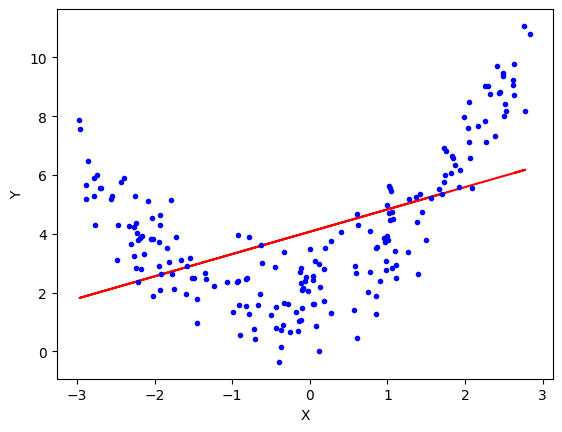

In [114]:
plt.plot(X_train,lr.predict(X_train),color = 'r')
plt.plot(X , y , "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [115]:
poly = PolynomialFeatures(degree = 2 , include_bias =True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [116]:
print (X_train[0])
print(X_train_trans[0])

[1.7254624]
[1.         1.7254624  2.97722048]


In [117]:
lr = LinearRegression()
lr.fit(X_train_trans , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
y_pred = lr.predict(X_test_trans)

In [119]:
r2_score(y_test,y_pred)

0.8541055298784263

In [120]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.830779   0.78457126]]
[2.01723526]


In [121]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

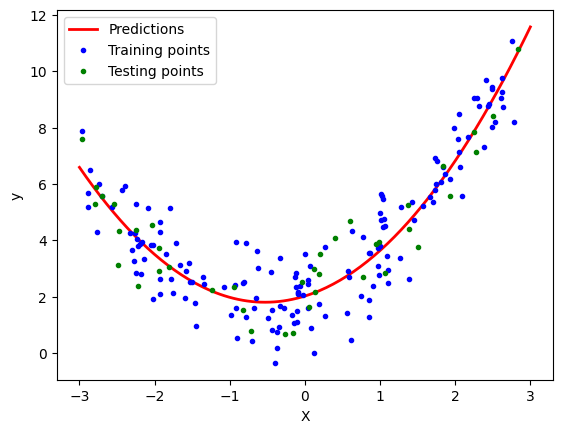

In [122]:
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(X_train,y_train,"b.",label='Training points')
plt.plot(X_test,y_test,"g.",label = "Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

polybig_features = PolynomialFeatures(degree=350)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

poly_pipeline = Pipeline([
    ("poly_features", polybig_features),  # ✅ comma added
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg)
])

poly_pipeline.fit(X, y)


c:\Users\Om Panchal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1163: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\Om Panchal\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,steps,"[('poly_features', ...), ('std_scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,350
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [124]:
poly_pipeline.fit(X, y)
pred = poly_pipeline.predict(X)


c:\Users\Om Panchal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1163: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\Om Panchal\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [125]:
poly.powers_

array([[0],
       [1],
       [2]])

c:\Users\Om Panchal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


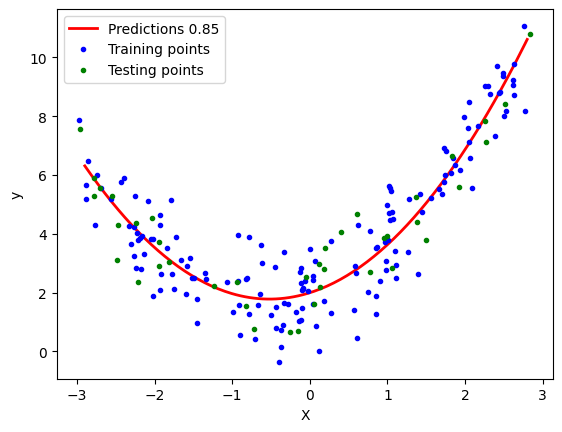

In [126]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [127]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)